<a href="https://colab.research.google.com/github/yishairasowsky/Sefaria-Project/blob/master/topic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
prayer_df = pd.read_csv('/prayer-sources.csv', 
                        # encoding="latin-1"
                        )
not_prayer_df = pd.read_csv('/not-prayer-sources.csv', 
                            # encoding="latin-1"
                            )

In [199]:
prayer_df.sample(5)

,Ref,En,He
765,Psalms 141:2-3,Let my prayer be set forth as incense before T...,תִּכּ֤וֹן תְּפִלָּתִ֣י קְטֹ֣רֶת לְפָנֶ֑יךָ מַֽ...
718,Nefesh HaChaim 2:12:4,NaN,ואף שגם רז''ל אמרו (ערובין ס''ה א') יכולני לפט...
803,Midrash Tehillim 108:1,NaN,שיר מזמור לאסף נכון לבי אלקים. זהו שאמר הכתוב ...
1016,Bava Metzia 59b:10-11,"The Gemara further relates: Imma Shalom, the w...","אימא שלום דביתהו דר""א אחתיה דר""ג הואי מההוא מע..."
787,Taanit 22b:14-16,§ The mishna further states that they sound th...,"על כל צרה שלא תבא על הצבור כו': ת""ר על כל צרה ..."


In [200]:
not_prayer_df.sample(5)

,Ref,En,He,Topics
931,Pesachim 78b:7,The Gemara asks: And was it not stated to prec...,ולעכב לא והתניא במכסת מלמד שאין הפסח נשחט אלא ...,laws-of-the-sacrifice-of-the-paschal-offering
759,Zohar 2:236a:1,NaN,"אֵת כָּל מְלֶאכֶת הַקֹּדֶשׁ וְגוֹ', מַאן אִינּ...",cecum
291,Sifrei Devarim 39:11,"Or, because it does drink irrigation water, bu...",או לפי ששותה מי שלחים אבל אינה שותה מי שלגים? ...,rain
221,Megillah 28b:12,"In contrast, there was a certain man who used ...",ההוא דהוי תני הלכתא סיפרא וסיפרי ותוספתא ושכיב...,rabbi-shimon-b-lakish|rav-nachman-b-yaakov|tal...
160,"Mishneh Torah, Fasts 4:3",And after this one finishes the words of submi...,וְאַחַר שֶׁגּוֹמֵר זֶה דִּבְרֵי כִּבּוּשִׁין ע...,laws-of-fasts


In [201]:
prayer_df['topic'] = 'prayer'
prayer_df = prayer_df[['En','topic']]
prayer_df.tail(3)

,En,topic
1049,"It is true that you are the one who judges, an...",prayer
1050,In these Berachot (blessings) we bow down: the...,prayer
1051,On seeds he says [the Beracha (blessing)] Bore...,prayer


In [202]:
prayer_df.shape

(1052, 2)

In [203]:
not_prayer_df['topic'] = 'not_prayer'
not_prayer_df = not_prayer_df[['En','topic']]
not_prayer_df.tail(3)

,En,topic
1048,"אל תבקשו לטמאה בהם, do not search them out as ...",not_prayer
1049,who said to another: I am hereby selling to yo...,not_prayer
1050,NaN,not_prayer


In [204]:
not_prayer_df.shape

(1051, 2)

In [205]:
all_prayer_frames = [prayer_df, not_prayer_df]
all_prayer_df = pd.concat(all_prayer_frames)
all_prayer_df.sample(5)

,En,topic
3,"And thou shalt say to the rebellious, even to ...",not_prayer
981,Having established all this we can appreciate ...,not_prayer
601,"And the LORD spoke unto Moses and unto Aaron, ...",not_prayer
390,"This evil trait is anger, because of which a p...",not_prayer
877,NaN,not_prayer


In [206]:
all_prayer_df.dropna(inplace=True)
all_prayer_df.sample(5)

,En,topic
302,Ravina objects to Rav Pappa’s assertion: In wh...,not_prayer
590,Rava says: What is different between the wordi...,not_prayer
249,The Gemara asks: What is the reason? Two verse...,not_prayer
52,§ The Gemara cites a series of questions that ...,prayer
782,The verse states: “Had you prepared your praye...,prayer


In [207]:
print(all_prayer_df.shape)
all_prayer_df.drop_duplicates(inplace=True)
print(all_prayer_df.shape)

(1247, 2)
(1221, 2)


In [208]:
all_prayer_df.isnull().sum()

En       0
topic    0
dtype: int64

In [209]:
all_prayer_df.sample(5)

,En,topic
775,The Gemara challenges: This is obvious that on...,not_prayer
879,"And Jacob said: ‘O God of my father Abraham, a...",prayer
560,Rabban Shimon ben Gamaliel used to say: on thr...,not_prayer
168,"And Shmuel can say: Usually, if one digs a pit...",not_prayer
1032,One who stands behind the synagogue and in-bet...,prayer


In [0]:
all_prayer_df['topic'] = all_prayer_df['topic'].map({'not_prayer': 0, 'prayer': 1})

In [211]:
all_prayer_df.sample(5)

,En,topic
68,And Rabbi Ḥiyya bar Abba said that Rabbi Yoḥan...,0
499,"96. Al Khazari: This is the true greatness, wh...",0
137,If the owner of the shearing did not manage to...,0
684,And named it Yokseil. For it set his teeth on ...,0
188,You shall walk after the service of the Lord y...,1


In [0]:
import nltk
# nltk.download('stopwords')
import string
from nltk.corpus import stopwords

def process_text(text):
    '''
    1. Keep only letters and spaces
    2. Remove stopwords
    3. Return list of clean text words
    '''
    
    #1
    chars_lst = [char for char in text if char in string.ascii_letters or char == ' ']
    # nopunc = []
    # for char in text:
    #     if char in string.ascii_letters or char == ' ':
    #         nopunc.append(char)
    chars_str = ''.join(chars_lst)
    
    #2
    clean_words = [word for word in chars_str.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words

In [213]:
sample_text = 'abc.!@#$%^&         liuhi u du sid c*('
process_text(sample_text)

['abc', 'liuhi', 'u', 'du', 'sid', 'c']

In [214]:
all_prayer_df['En'].head().apply(process_text)

0    [Another, Abba, Binyamins, statements, regard,...
1    [taught, baraita, Abba, Binyamin, said, Ones, ...
2    [Additionally, Ravin, bar, Rav, Adda, said, Ra...
3    [Similarly, taught, baraita, Rabbi, Yishmael, ...
4    [meaning, written, let, prayer, unto, Lord, ti...
Name: En, dtype: object

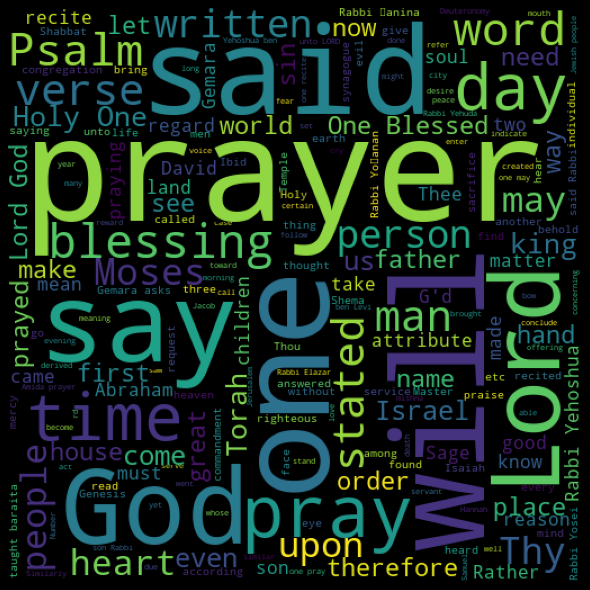

In [215]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['topic'] == 1]['En']))
prayer_wc = WordCloud(width = 512,height = 512).generate(prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

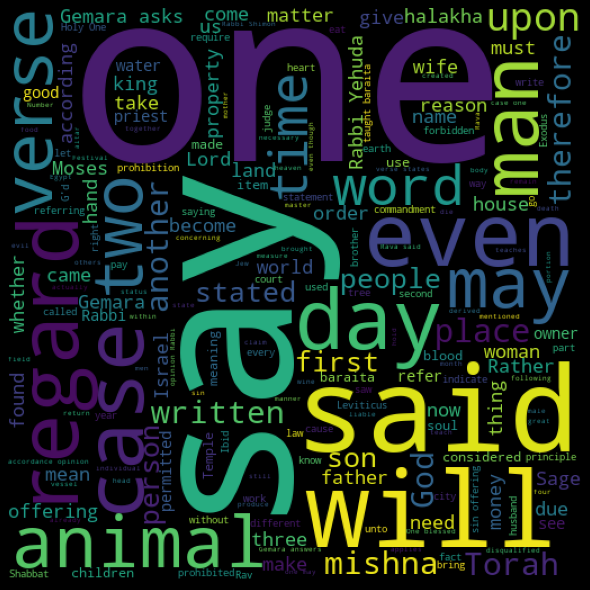

In [216]:
not_prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['topic'] == 0]['En']))
not_prayer_wc = WordCloud(width = 512,height = 512).generate(not_prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(not_prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [0]:
# Convert a collection of text documents to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer
prayer_bag_of_words = CountVectorizer(analyzer=process_text).fit_transform(all_prayer_df['En'])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(prayer_bag_of_words, all_prayer_df['topic'], test_size=0.20, random_state=0)

In [219]:
# shape of prayer bag of words
prayer_bag_of_words.shape

(1221, 11254)

In [0]:
# Create and train the naive Bayes classifier
# The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [0]:
# # print the predictions
# print(classifier.predict(X_train))

# # print the actual values
# print(y_train.values)

In [222]:
# Evaluate the model on the training data set

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_train, pred))
print()
print('Accuracy : ',accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       529
           1       0.91      0.99      0.95       447

    accuracy                           0.95       976
   macro avg       0.95      0.96      0.95       976
weighted avg       0.96      0.95      0.95       976


Confusion Matrix:
 [[486  43]
 [  3 444]]

Accuracy :  0.9528688524590164


In [0]:
# # print the predictions
# print(classifier.predict(X_test))

# # print the actual values
# print(y_test.values)

In [224]:
# Evaluate the model on the testing data set

pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix:\n',confusion_matrix(y_test, pred))
print()
print('Accuracy : ',accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.66      0.78       139
           1       0.68      0.94      0.79       106

    accuracy                           0.78       245
   macro avg       0.81      0.80      0.78       245
weighted avg       0.83      0.78      0.78       245


Confusion Matrix:
 [[ 92  47]
 [  6 100]]

Accuracy :  0.7836734693877551
